[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


       Имя пользователя Дата комментария  \
0  Zhanara Zhakizhanovа       2024-11-13   
1      Александр Иванов       2024-11-12   
2         Султан Аканов       2024-11-12   
3        Almas Sharipov       2024-11-09   
4     Айсанем Еркебаева       2024-11-09   

                                   Текст комментария Дата ответа  \
0  Не верно ставят диагноз травматолог не смог по...         NaN   
1  Пришел сдавать кучу анализов, какие-то посчита...         NaN   
2                            Лучшие специалисты тут.  2024-11-12   
3  Были у стаматолога ужас просто, 3 кабинета тол...  2024-11-09   
4  Ужасно некомпетентные сотрудники, вроде бы час...  2024-11-09   

                                        Текст ответа  Оценка  Статус  
0                                                NaN       1       0  
1                                                NaN       1       0  
2  Уважаемый Cултан Аканов,\n\nБлагодарим вас за ...       5       1  
3  Уважаемый Almas Sharipov,\n\nБлагодарим

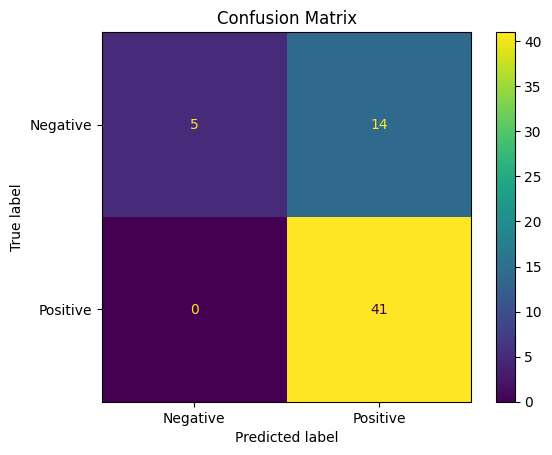

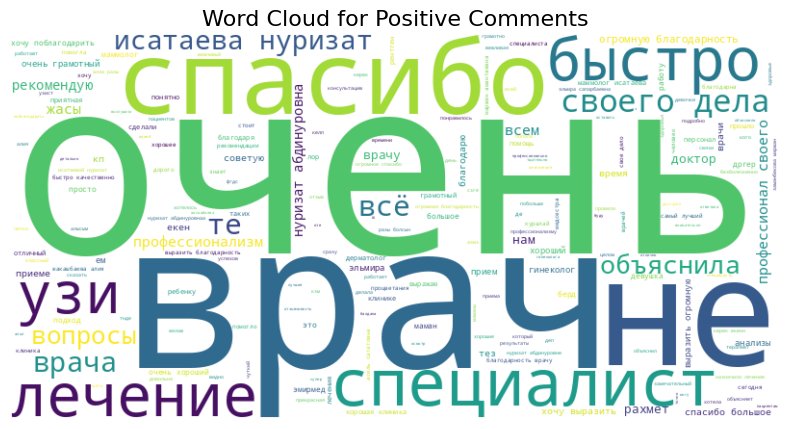

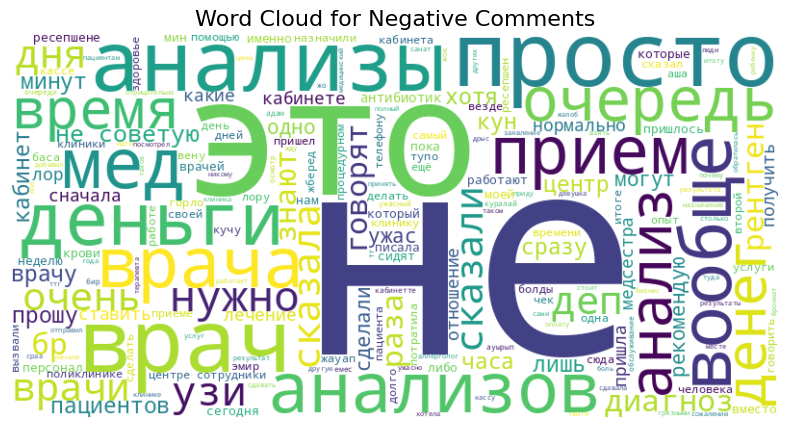

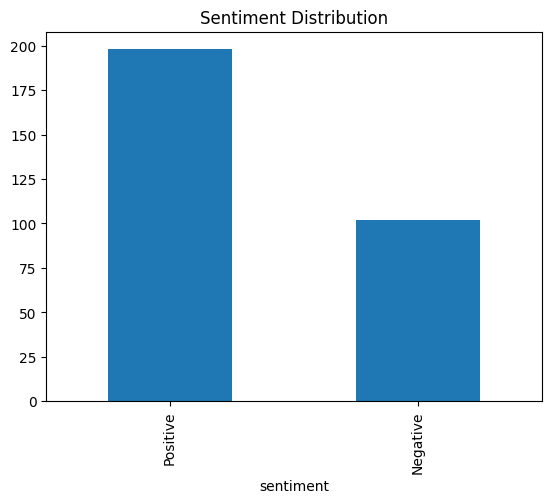

       Имя пользователя Дата комментария  \
0  Zhanara Zhakizhanovа       2024-11-13   
1      Александр Иванов       2024-11-12   
2         Султан Аканов       2024-11-12   
3        Almas Sharipov       2024-11-09   
4     Айсанем Еркебаева       2024-11-09   

                                   Текст комментария Дата ответа  \
0  Не верно ставят диагноз травматолог не смог по...         NaN   
1  Пришел сдавать кучу анализов, какие-то посчита...         NaN   
2                            Лучшие специалисты тут.  2024-11-12   
3  Были у стаматолога ужас просто, 3 кабинета тол...  2024-11-09   
4  Ужасно некомпетентные сотрудники, вроде бы час...  2024-11-09   

                                        Текст ответа  Оценка  Статус  \
0                                                NaN       1       0   
1                                                NaN       1       0   
2  Уважаемый Cултан Аканов,\n\nБлагодарим вас за ...       5       1   
3  Уважаемый Almas Sharipov,\n\nБлагод

,morphological_features
0,"[(не, не, PRCL, None, None, None), (верно, вер..."
1,"[(пришел, прийти, VERB, masc, sing, None), (сд..."
2,"[(лучшие, хороший, ADJF, None, plur, nomn), (с..."
3,"[(стаматолога, стаматолог, NOUN, masc, sing, g..."
4,"[(ужасно, ужасно, ADVB, None, None, None), (не..."
...,...
295,"[(консультации, консультация, NOUN, femn, plur..."
296,"[(добрый, добрый, ADJF, masc, sing, nomn), (но..."
297,"[(хотела, хотеть, VERB, femn, sing, None), (вы..."
298,"[(прошу, просить, VERB, None, sing, None), (уб..."


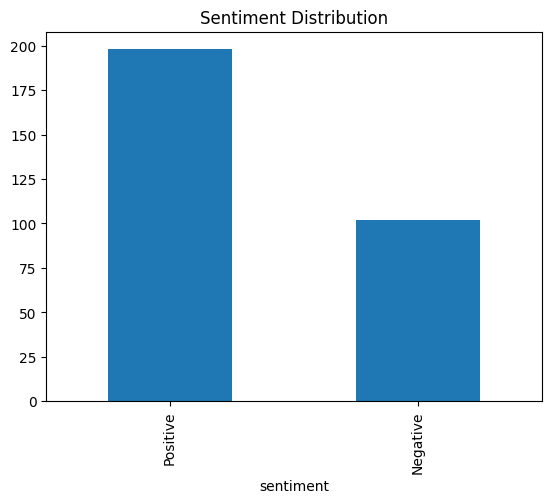

<Figure size 640x480 with 0 Axes>

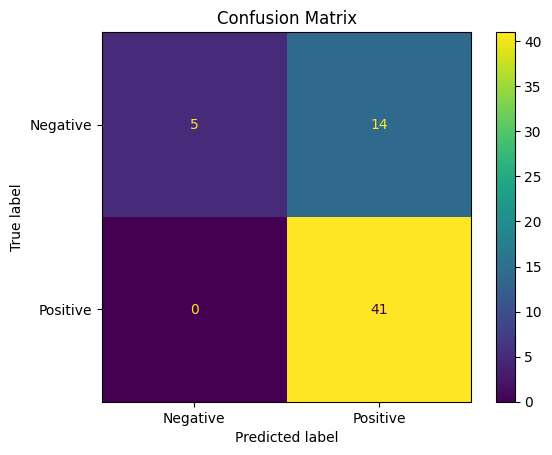

In [15]:
import pandas as pd
import re
import nltk
import pymorphy2
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from collections import Counter

# Download necessary resources
nltk.download('stopwords')

# Initialize the morphological analyzer for Russian (use appropriate tool for Kazakh if needed)
morph = pymorphy2.MorphAnalyzer()

# Define stopwords for Kazakh and Russian
stop_words_kazakh = set(nltk.corpus.stopwords.words('kazakh'))
stop_words_russian = set(nltk.corpus.stopwords.words('russian'))

# Define negation words
negation_words = {'не', 'жоқ', 'емес'}

# Combine stopwords from Kazakh and Russian, excluding negation words
custom_stopwords = stop_words_kazakh | stop_words_russian
custom_stopwords -= negation_words

# Define common words for validation (example list)
common_words = set(["сөз", "жақсы", "көмек", "көбірек", "мұғалім", "адам"])  # Add real common words here

# Rule-Based Lemmatization for Kazakh
def lemmatize_kazakh(word):
    suffixes = [
        "лар", "лер", "дар", "дер", "тар", "тер",  # Plural suffixes
        "ның", "нің", "нан", "нен", "ды", "ді", "ты", "ті",  # Case suffixes
        "ым", "ім", "ың", "ің", "ыңыз", "іңіз",  # Possessive suffixes
        "ға", "ге", "қа", "ке", "да", "де", "та", "те"  # Dative suffixes
    ]
    for suffix in suffixes:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

# Function to validate lemma
def validate_lemma(word, common_words):
    lemma = lemmatize_kazakh(word)
    if lemma in common_words:
        return lemma
    return word

# Function to clean text by removing numbers, punctuation, and filtering stopwords
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()
    words = [word for word in text.split() if word not in custom_stopwords]
    # Remove non-Cyrillic characters and normalize spacing
    text = re.sub(r'[^А-Яа-яЁё0-9 ]', '', str(text))
    text = re.sub(r'\s+', ' ', text).strip().lower()
    return ' '.join(words)

# Function to clean text with advanced Kazakh lemmatization
def clean_text_advanced_kazakh(text, common_words):
    text = re.sub(r'[^А-Яа-яЁё0-9 ]', '', str(text))  # Remove non-Cyrillic characters
    text = re.sub(r'\s+', ' ', text).strip().lower()  # Normalize spacing
    words = text.split()
    words = [validate_lemma(word, common_words) for word in words if word not in custom_stopwords]
    return ' '.join(words)

# Load Dataset
comments_df = pd.read_csv('comments_data.csv')
print(comments_df.head())

# Apply the advanced cleaning with lemmatization and custom stopwords
comments_df['cleaned_comment'] = comments_df['Текст комментария'].apply(lambda x: clean_text_advanced_kazakh(x, common_words))

def extract_morphological_features(text):
    words = text.split()
    features = []
    for word in words:
        analysis = morph.parse(word)[0]  # Get the first analysis result
        lemma = analysis.normal_form  # Lemmatized form of the word
        pos_tag = analysis.tag.POS  # Part of Speech (e.g., 'NOUN', 'VERB')

        # Initialize gender, number, and case as None by default
        gender = number = case = None

        try:
            # Try to get the gender, number, and case
            gender = analysis.tag.gender
        except ValueError:
            gender = None

        try:
            number = analysis.tag.number
        except ValueError:
            number = None

        try:
            case = analysis.tag.case
        except ValueError:
            case = None

        features.append((word, lemma, pos_tag, gender, number, case))

    return features

# Extract morphological features for the first 10 rows
comments_df['morphological_features'] = comments_df['cleaned_comment'].apply(lambda x: extract_morphological_features(x))

# Example: Sentiment Mapping and Cleaning Text
def map_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    else:
        return 'Positive'

comments_df['sentiment'] = comments_df['Оценка'].apply(map_sentiment)

# Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(comments_df['cleaned_comment'])
y = comments_df['sentiment']


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train Model (Logistic Regression)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)

# Classification Report for Sentiment Analysis
print("Classification Report for Sentiment Analysis:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# Word Cloud Visualization for different sentiments
def generate_word_cloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Word clouds for each sentiment class (removing 'Neutral')
for sentiment in ['Positive', 'Negative']:
    sentiment_text = ' '.join(comments_df[comments_df['sentiment'] == sentiment]['cleaned_comment'])
    generate_word_cloud(sentiment_text, f"Word Cloud for {sentiment} Comments")

# Sentiment Distribution Visualization (removing 'Neutral')
comments_df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()

# Save output to a text file
with open("output_results.txt", "w") as file:
    file.write("Classification Report for Sentiment Analysis:\n")
    file.write(classification_report(y_test, y_pred))
    file.write("\n\nMorphological Features (First 10 rows):\n")
    for index, row in comments_df.head(10).iterrows():
        file.write(f"Comment {index + 1}:\n")
        for word, lemma, pos_tag, gender, number, case in row['morphological_features']:
            file.write(f"Word: {word}, Lemma: {lemma}, POS: {pos_tag}, Gender: {gender}, Number: {number}, Case: {case}\n")
        file.write("\n")
    file.write("\nSentiment Distribution:\n")
    file.write(str(comments_df['sentiment'].value_counts()))
    file.write("\n")
    file.write("Sentiment Distribution Visualization and other visualizations are shown as plots.")

# Saving plot images to files
plt.figure()
comments_df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.savefig('sentiment_distribution.png')

plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix.png')

# Saving word clouds images
for sentiment in ['Positive', 'Negative']:
    sentiment_text = ' '.join(comments_df[comments_df['sentiment'] == sentiment]['cleaned_comment'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(sentiment_text)
    wordcloud.to_file(f'{sentiment.lower()}_word_cloud.png')

print(comments_df.head())

comments_df['morphological_features']


In [12]:
from sklearn.metrics import accuracy_score

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train Model (Logistic Regression)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)

# Calculate and display Accuracy as a percentage
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 76.67%


In [8]:
!pip install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 42.7 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=906dfe474a3d9b71f293de1bb3268ed56aced55af920f43de23189336991c629
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [14]:
import pandas as pd
import pymorphy2
import re
import string

# Initialize the MorphAnalyzer
morph = pymorphy2.MorphAnalyzer(lang='ru')

# Lists to hold the morphological feature values for each row
aspectimpf = []
aspectperf = []
genderm = []
genderf = []
gendern = []
involvement = []
person_f = []
person_s = []
person_t = []
tense_pa = []
tense_pr = []
tense_fu = []

# Function to perform morphological analysis
def morphanalysis(word):
    lenof = len(word)
    senof = len(re.split(r'[.!?]+', word))  # Counting sentences by punctuation marks

    # Очищаем слово от знаков препинания и разделяем на компоненты
    analysis = [char for char in word if char not in string.punctuation]
    analysis = ''.join(analysis).split(' ')

    # Инициализируем счётчики для морфологических признаков
    aimpf = 0
    aperf = 0
    gm = 0
    gf = 0
    gn = 0
    excl = 0
    first = 0
    second = 0
    third = 0
    past = 0
    present = 0
    future = 0

    # Проходим по каждому слову в предложении
    for i in analysis:
        # Получаем морфологический разбор для каждого слова
        aaa = morph.parse(i)[0]

        # Определяем аспект (совершенный или несовершенный)
        if aaa.tag.aspect == 'impf':
            aimpf += 1
        if aaa.tag.aspect == 'perf':
            aperf += 1

        # Определяем род (мужской, женский, средний)
        if aaa.tag.gender == 'masc':
            gm += 1
        if aaa.tag.gender == 'femn':
            gf += 1
        if aaa.tag.gender == 'neut':
            gn += 1

        # Определяем вовлеченность (участие говорящего)
        if aaa.tag.involvement == 'excl':
            excl = 1

        # Определяем лицо (1-е, 2-е, или 3-е лицо)
        if aaa.tag.person == '1per':
            first += 1
        if aaa.tag.person == '2per':
            second += 1
        if aaa.tag.person == '3per':
            third += 1

        # Определяем время (прошедшее, настоящее, будущее)
        if aaa.tag.tense == 'past':
            past += 1
        if aaa.tag.tense == 'pres':
            present += 1
        if aaa.tag.tense == 'futr':
            future += 1

    # Добавляем результаты в списки
    aspectimpf.append(round(aimpf / senof, 2))
    aspectperf.append(round(aperf / senof, 2))
    genderm.append(round(gm / senof, 2))
    genderf.append(round(gf / senof, 2))
    gendern.append(round(gn / senof, 2))
    involvement.append(excl)
    person_f.append(round(first / senof, 2))
    person_s.append(round(second / senof, 2))
    person_t.append(round(third / senof, 2))
    tense_pa.append(round(past / senof, 2))
    tense_pr.append(round(present / senof, 2))
    tense_fu.append(round(future / senof, 2))

for iii in range(len(comments_df)):
    morphanalysis(comments_df['cleaned_comment'][iii])

dataset = pd.DataFrame({
    'aspectimpf': aspectimpf,
    'aspectperf': aspectperf,
    'genderm': genderm,
    'genderf': genderf,
    'gendern': gendern,
    'involvement': involvement,
    'person_f': person_f,
    'person_s': person_s,
    'person_t': person_t,
    'tense_pa': tense_pa,
    'tense_pr': tense_pr,
    'tense_fu': tense_fu
})

print(dataset.head(10))
mean_values = dataset.mean()

print("Mean of each morphological feature:")
print(mean_values)



   aspectimpf  aspectperf  genderm  genderf  gendern  involvement  person_f  \
0        10.0        10.0     15.0     13.0      2.0            0       3.0   
1         7.0        11.0     18.0      7.0      4.0            0       0.0   
2         0.0         0.0      1.0      0.0      0.0            0       0.0   
3        16.0         4.0     32.0      5.0      2.0            0       0.0   
4         9.0         1.0      5.0      7.0      5.0            0       0.0   
5         4.0         2.0      5.0      8.0      1.0            0       2.0   
6         0.0         2.0      4.0      4.0      3.0            0       0.0   
7         5.0         3.0      9.0     10.0      3.0            0       1.0   
8         0.0         0.0      0.0      0.0      0.0            0       0.0   
9         2.0         2.0      9.0      4.0      4.0            0       0.0   

   person_s  person_t  tense_pa  tense_pr  tense_fu  
0       0.0       1.0      13.0       5.0       0.0  
1       1.0       4.0 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 300, 'C': 545.5594781168514}
Classification Report for Sentiment Analysis:
              precision    recall  f1-score   support

    Negative       0.95      0.95      0.95        19
    Positive       0.98      0.98      0.98        41

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



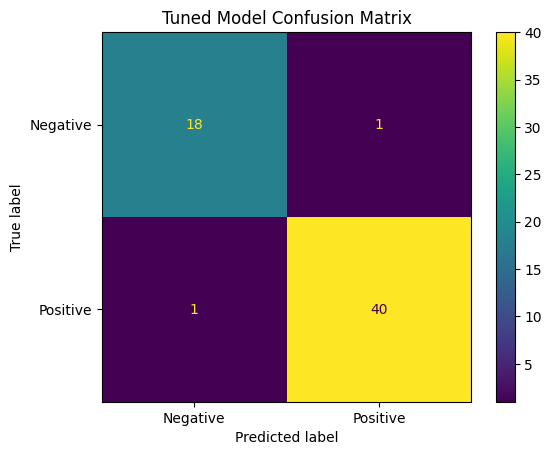

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the parameter grid for Logistic Regression
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Regularization parameter (log scale)
    'penalty': ['l1', 'l2'],      # Type of regularization
    'solver': ['liblinear', 'saga'],  # Solver to use
    'max_iter': [100, 200, 300]   # Number of iterations
}

# Step 2: Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Step 3: Initialize RandomizedSearchCV with cross-validation (5-fold)
random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations (random combinations to try)
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric (accuracy)
    verbose=2,  # Print results for each iteration
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available processors
)

# Step 4: Fit the RandomizedSearchCV model
random_search.fit(X_train, y_train)

# Step 5: Get the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 6: Train the Logistic Regression model with the best parameters
best_model = random_search.best_estimator_

# Step 7: Evaluate the model on the test set
y_pred_best = best_model.predict(X_test)

# Classification report for sentiment analysis
print("Classification Report for Sentiment Analysis:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for the tuned model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.title("Tuned Model Confusion Matrix")
plt.show()


In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

def scrape_emir_med():
    url = "https://2gis.kz/almaty/branches/70000001024623697"

    driver.get(url)  # Open the page

    time.sleep(5)

    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')

    items = soup.find_all('div', class_='item')

    data = []
    for item in items:
        title = item.find('h2').text if item.find('h2') else "No Title"
        description = item.find('p').text if item.find('p') else "No Description"
        data.append({'title': title, 'description': description})

    for entry in data:
        print(f"Title: {entry['title']}")
        print(f"Description: {entry['description']}")
        print("-" * 50)

    driver.quit()

scrape_emir_med()